In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import phyre
import torch
import logging
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.WARNING) 

In [2]:
tier = 'ball'
eval_setup = 'ball_within_template'
fold_id = 0
random.seed(0)

### 1. Initialize the  Simulation Cache

In [3]:
train, dev, test = phyre.get_fold(eval_setup, fold_id)
print('Size of resulting splits:\n train:', len(train), '\n dev:',
      len(dev), '\n test:', len(test))

Size of resulting splits:
 train: 1600 
 dev: 400 
 test: 500


In [4]:
cache = phyre.get_default_100k_cache(tier)
print('cache.action_array shape:', cache.action_array.shape)

cache.action_array shape: (100000, 3)


### 2. Initialize the DQN Agent

In [5]:
from dqn import DQNAgent

DEBUG:root:test


In [6]:
agent = DQNAgent()

### Load Model

In [7]:
#model = agent.build_model()
#new_model = TestModel()
#model.load_state_dict(torch.load("./model/test_model.pth"))
#state = dict(model =model, cache = cache)

### 3. Train the Agent

In [8]:
state, statistic = agent.train(cache, train, tier, test)

INFO:root:Preprocess the training data
INFO:root:Train set: size=117005756, solved_ratio=1.71%
INFO:root:Create evaluation data from train & dev
INFO:root:Start initializing the Model
INFO:root:Start Training the Model
/home/mynsng/anaconda3/envs/phyre/lib/python3.6/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


In [9]:
#num = -2:"host_softmax" not implemented for 'Long'

max_loss = statistic['max_loss']
print(max_loss[-10:])
min_loss = statistic['min_loss']
print(min_loss[-10:])
mean_loss = statistic['mean_loss']
print(mean_loss[-10:])
max_loss_index= statistic['max_loss_index']
print(max_loss_index[-10:])
min_loss_index= statistic['min_loss_index']
print(min_loss_index[-10:]) 
max_loss_action = statistic['max_loss_action']
print(max_loss_action[-10:])
min_loss_action = statistic['min_loss_action']
print(min_loss_action[-10:])
loss_var = statistic['loss_var']
print(loss_var[-10:])

i=8
a = max_loss_index[-10:][i].item()
b = max_loss_action[-10:][i].cpu().numpy()

print(a, b)

[0.5408456921577454, 0.23286132514476776, 0.19823409616947174, 0.15645405650138855, 0.15823987126350403, 0.14809434115886688, 0.14089152216911316, 0.14975720643997192, 0.13117368519306183, 0.16742584109306335]
[0.022753331810235977, 0.03143106773495674, 0.08060690760612488, 0.0467061884701252, 0.06294333934783936, 0.04488689452409744, 0.038178201764822006, 0.06256237626075745, 0.0315045602619648, 0.04378730058670044]
[0.1635364592075348, 0.13338911533355713, 0.12065355479717255, 0.09792641550302505, 0.10597852617502213, 0.09607907384634018, 0.09594450891017914, 0.11554916948080063, 0.0862240269780159, 0.09784016013145447]
[tensor(848), tensor(781), tensor(190), tensor(866), tensor(162), tensor(321), tensor(833), tensor(859), tensor(72), tensor(1501)]
[tensor(43), tensor(40), tensor(929), tensor(1251), tensor(721), tensor(1252), tensor(39), tensor(463), tensor(30), tensor(15)]
[tensor([0.5473, 0.6874, 0.8864], device='cuda:0'), tensor([0.6765, 0.3761, 0.1848], device='cuda:0'), tensor([

### Visualize

In [10]:
task_ids = [train[a]]
action = b
images, predict_images = agent.predict_qa(state, task_ids, tier, action)

ValueError: math domain error

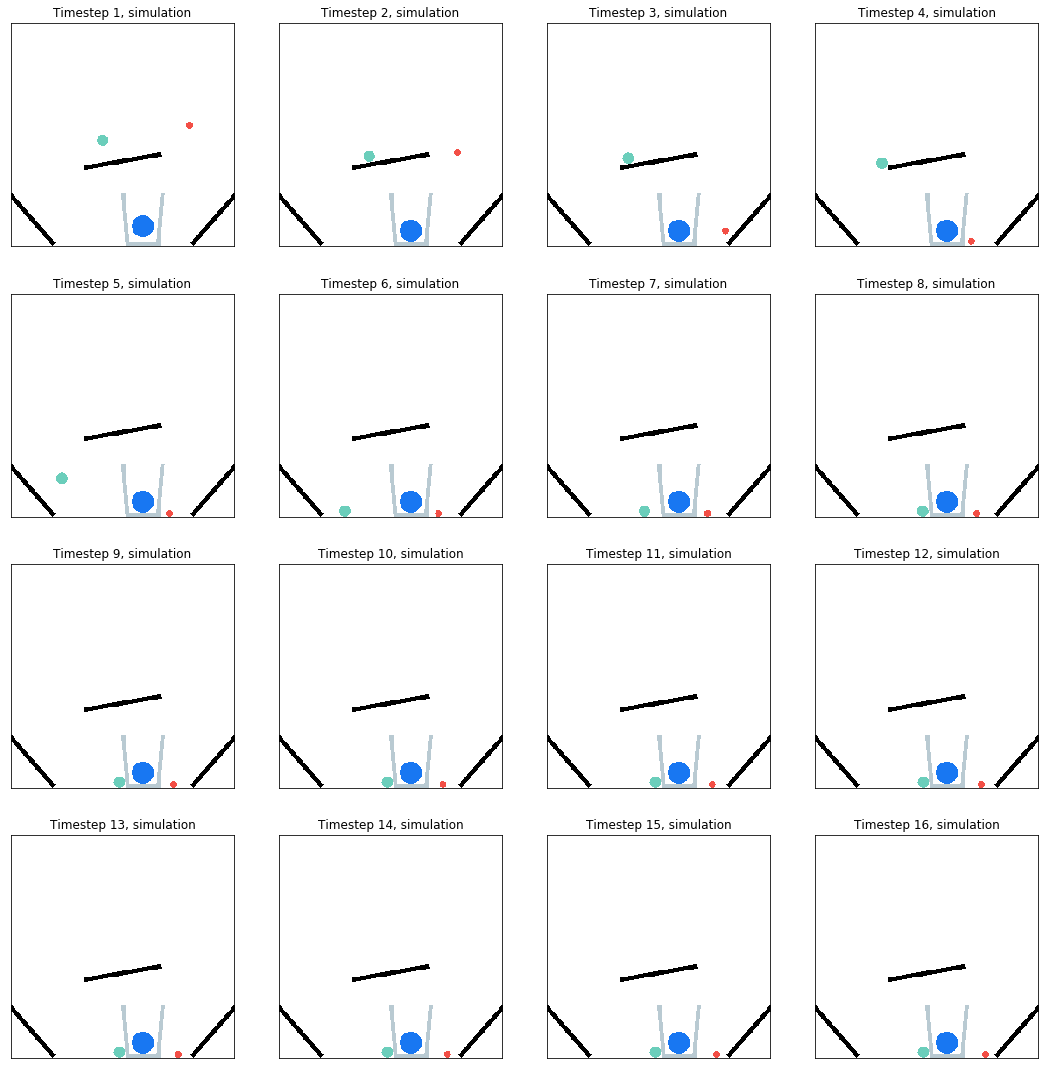

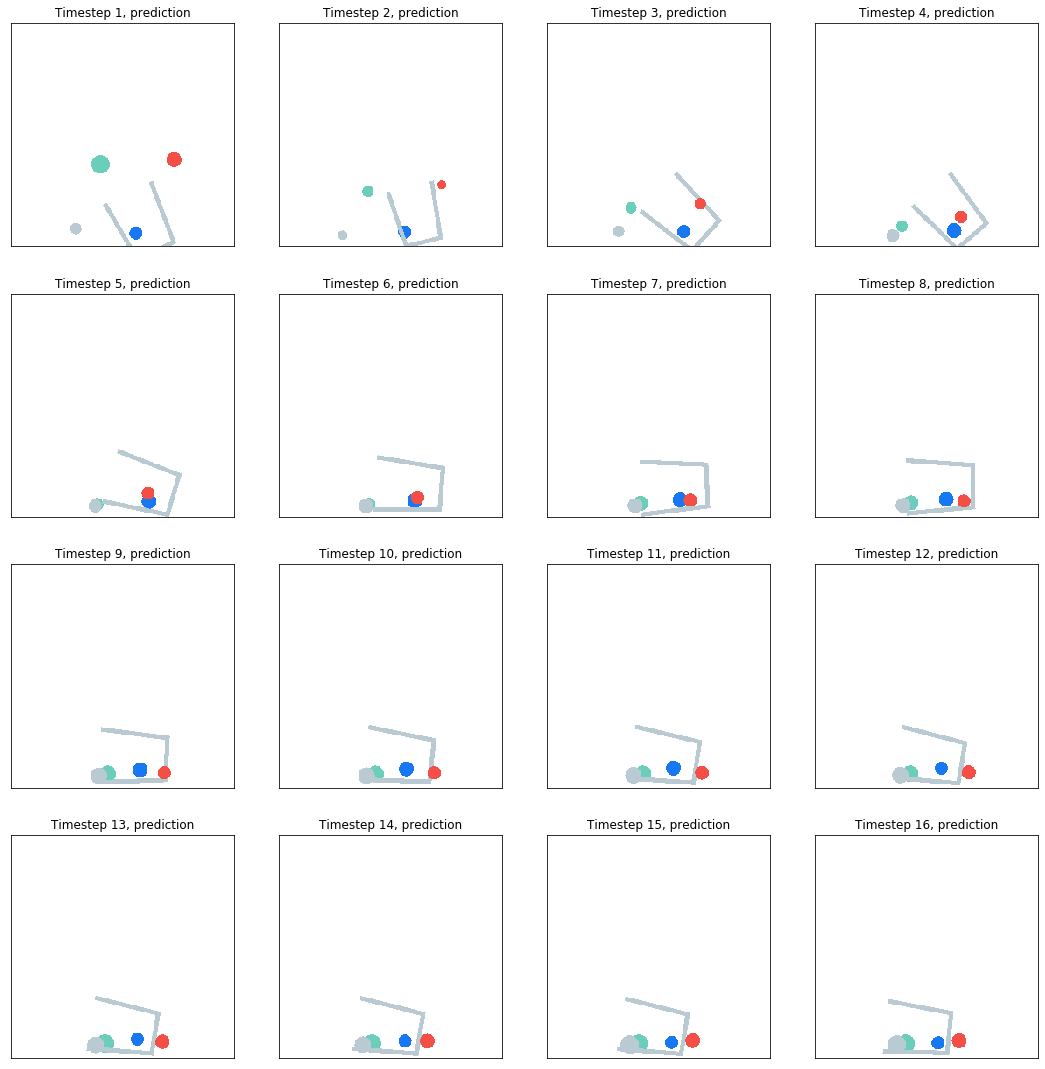

In [31]:
# plot할 개수 설정
fig1, axs1 = plt.subplots(4, 4, figsize=(15, 15))
fig1.tight_layout()
plt.subplots_adjust(hspace=0.2, wspace=0.2)

fig2, axs2 = plt.subplots(4, 4, figsize=(15, 15))
fig2.tight_layout()
plt.subplots_adjust(hspace=0.2, wspace=0.2)

# plot 해보리기~~
for i, (ax, image) in enumerate(zip(axs1.flatten(), images)):
    # Convert the simulation observation to images.
    img = phyre.observations_to_float_rgb(image)
    ax.imshow(img)
    
    ax.title.set_text(f'Timestep {i+1}, simulation')
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    
for i, (ax, image) in enumerate(zip(axs2.flatten(), predict_images)):
    # Convert the simulation observation to images.
    img = phyre.observations_to_float_rgb(image)
    ax.imshow(img)
    
    ax.title.set_text(f'Timestep {i+1}, prediction')
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

### 4. Evaluate the Agent

#### 4.1 Percentage of solved tasks per number of attempts

In [11]:
loss = agent.get_test_loss(state, test, tier)
print(loss)

0.006694691546726972


#### 4.2 AUCESS

In [12]:
model  = state['model']

# save
savePath = "./model/test_model.pth"
torch.save(model.state_dict(), savePath)

# load
#new_model = TestModel()
#new_model.load_state_dict(torch.load("./output/test_model.pth"))